In [32]:
#Problem 2

import urllib
from six.moves import cPickle
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

#Load Data from URL
x = cPickle.load(urllib.request.urlopen("https://www.dropbox.com/s/4ws06b7li283zks/lasso_input_data.pkl?dl=1"))
y = cPickle.load(urllib.request.urlopen("https://www.dropbox.com/s/taw1xkmgz5sg3tz/lasso_target_data.pkl?dl=1"))


[[-9.15390360e-02]
 [ 4.87086627e-02]
 [-4.85342771e-03]
 [ 2.83707509e+00]
 [-2.64040318e+00]
 [ 5.91293396e+00]
 [-7.42440708e-03]
 [-9.65666644e-01]
 [ 1.70566615e-01]
 [-9.44053724e-03]
 [-3.92268181e-01]
 [ 1.49667566e-02]
 [-4.18205341e-01]]


<StemContainer object of 3 artists>

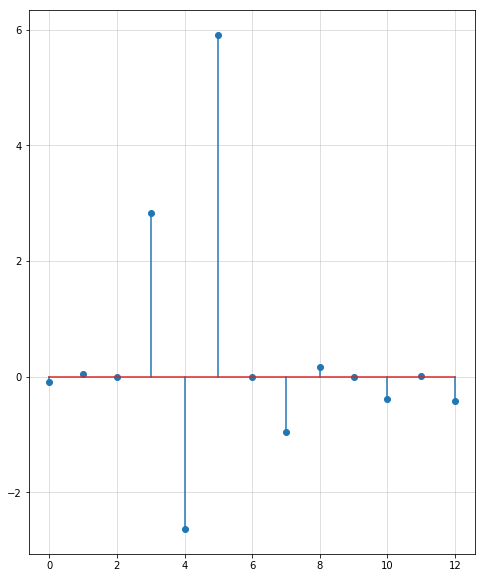

In [55]:
#Problem 2(a)
#Build the linear regression model using Lasso regularizer.

lamb = 3

y = np.asmatrix(y).reshape([-1,1])
x = np.asmatrix(x)

theta = cvx.Variable([13,1])
obj = cvx.Minimize(cvx.sum_squares(x*theta-y)+lamb+cvx.norm(theta,1))
prob = cvx.Problem(obj).solve()
print(theta.value)
plt.grid(alpha = 0.5)
plt.stem(np.arange(13),theta.value)

w = 0 , Number of Variables 7
w = 1 , Number of Variables 6
w = 2 , Number of Variables 4
w = 3 , Number of Variables 4
w = 4 , Number of Variables 4
w = 5 , Number of Variables 4
w = 6 , Number of Variables 4
w = 7 , Number of Variables 4
w = 8 , Number of Variables 4
w = 9 , Number of Variables 4


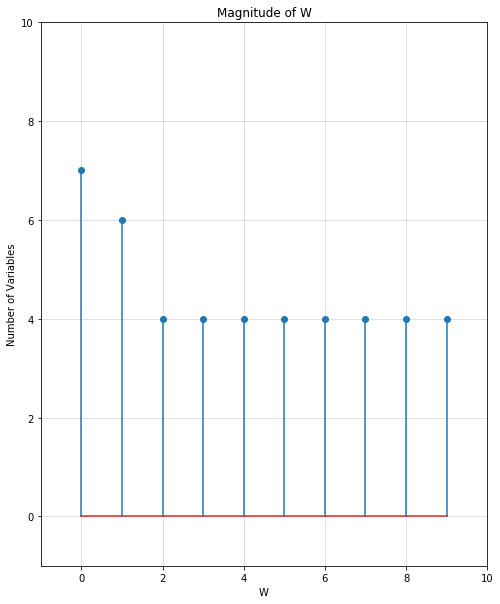

In [52]:
#Problem 2(b)
#After applying Lasso, we can select meaningful features. Plot the magnitudes of all 
#w's and tell which features are important.

lamb = 3

n = 10

y = np.asmatrix(y).reshape([-1,1])
x = np.asmatrix(x)

index = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12],[0,1,2,3,4,5,6,7,8,9,10,11,12]])

magnitude = np.array([])

for w in range(n):
    theta = cvx.Variable([len(index[0]),1])
    obj = cvx.Minimize(cvx.sum_squares(x[:,index[0]]*theta-y)+lamb*cvx.norm(theta,1))
    prob = cvx.Problem(obj).solve()
    index= np.where(np.abs(theta.value)>0.1)
    print('w =',w,', Number of Variables',len(index[0]))
    magnitude  = np.hstack((magnitude , len(index[0])))

# set the x axis and y axis limits
plt.xlim([-1,10])
plt.ylim([-1,10])
 
# Provide a title for the stem plot
plt.title('Magnitude of W')
 
# Give x axis label for the stem plot
plt.xlabel('W')
 
# Give y axis label for the stem plot
plt.ylabel('Number of Variables') #Meaningful Features
plt.grid(alpha = 0.5)
# plot the stem plot using matplotlib
plt.stem(np.arange(n), magnitude)
 
# display the stem plot
plt.show()=

Text(0, 0.5, 'x$_{original}$')

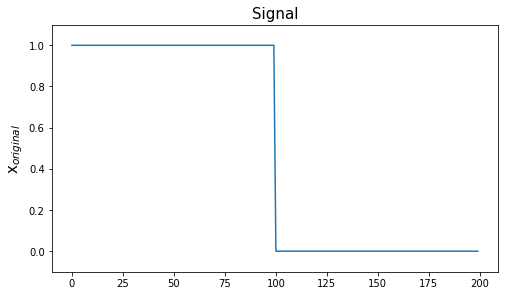

In [56]:
#Problem 3: Data Generation (a)

# Generate the original signal as shown in the below figure. 
# This can be simply done using ones and zeros commands in Python.
import numpy as np
import matplotlib.pyplot as plt

n = 200
t = np.arange(n).reshape(-1,1)
exact = np.vstack([np.ones([100,1]), np.zeros([100,1])])

orig_x = exact

plt.rcParams['figure.figsize'] = (8, 10)

#Original Signal
plt.subplot(2,1,1)
plt.subplots_adjust(hspace = 0.2)

plt.plot(t,orig_x)
plt.ylim([-0.1,1.1])
plt.title('Signal' , fontsize = 15)
plt.ylabel('x$_{original}$', fontsize = 15)


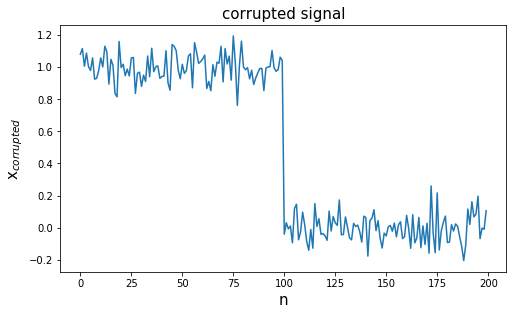

In [59]:
#Problem 3: Data Generation (b)
# Generate the corrupt signal with Gaussian noise with respect to 
# the original signal. This can be done using randn command in Python. 

noise = 0.1*np.random.randn(n,1)

# y = x + w (noise)
corrupt_x = orig_x + noise

#Corrupted Signal
plt.subplot(2,1,1)
plt.plot(t, corrupt_x)
plt.ylabel('x$_{corrupted}$', fontsize = 15)
plt.xlabel('n', fontsize = 15)
plt.title('corrupted signal', fontsize = 15)

plt.show()



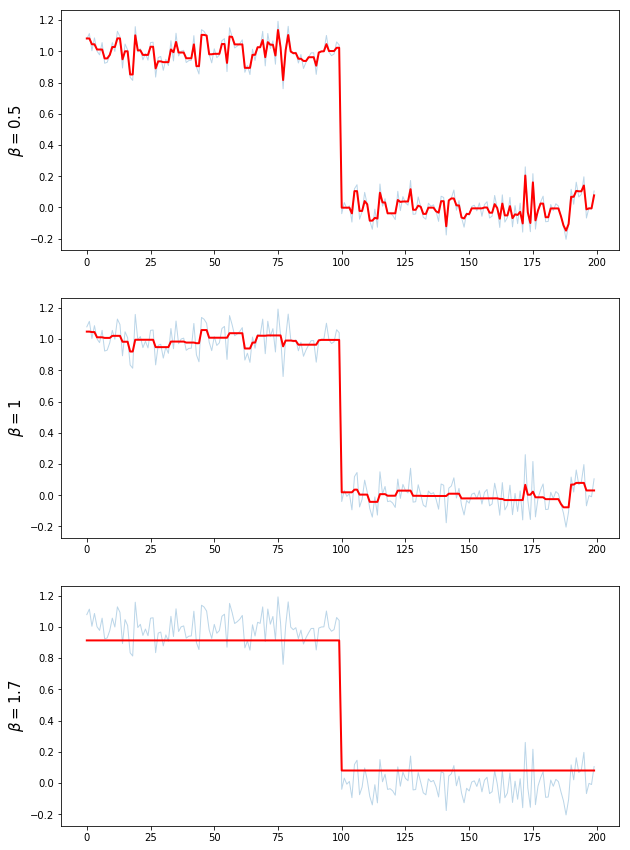

In [62]:

#Problem 3: l1 Optimization(c)
#  Plot the reconstructed signal. In addition, by changing the beta, 
#  explain how beta affects in an optimization process. 
import cvxpy as cvx
plt.figure(figsize=(10, 15))

beta = [0.5, 1, 1.7] # beta = 1.7 provides a good optimization

for i in range(len(beta)):
    x_reconst = cvx.Variable([n,1])
    obj = cvx.Minimize(cvx.norm(x_reconst[1:n] - x_reconst[0:n-1],1))
    const = [cvx.norm(x_reconst-corrupt_x, 2) <= beta[i]]
    prob = cvx.Problem(obj, const).solve()
    
    plt.subplot(len(beta), 1, i+1)
    plt.plot(t, corrupt_x, linewidth = 1, alpha = 0.3)
    plt.plot(t, x_reconst.value, 'r', linewidth = 2)
    plt.ylabel(r'$\beta = {}$'.format(beta[i]), fontsize = 15)
    
plt.show()

#Beta = 1.7 provides a good optimization

# As beta increases, there will be better preservation of sharp transitions in the signal and better removal of noise